In [14]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import zipfile

# Path to the zip file
zip_file_path = r'/workspaces/Belajar-Machine-Learning-Dasar/2024-indonesian-election-results.zip'
# Directory to extract to
extract_to_path = r'/workspaces/Belajar-Machine-Learning-Dasar/Belajar /data'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

print(f'File extracted to {extract_to_path}')

File extracted to /workspaces/Belajar-Machine-Learning-Dasar/Belajar /data


In [3]:
# Load Data
pemilihan_df = pd.read_csv('../Belajar /data/Indonesian_Election_Results_2024.csv')

In [4]:
# Data Info
pemilihan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Province          39 non-null     object
 1   Anies Baswedan    39 non-null     int64 
 2   Prabowo Subianto  39 non-null     int64 
 3   Ganjar Pranowo    39 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.3+ KB


In [9]:
# isi kolom province
pemilihan_df['Province'].unique()

array(['Aceh', 'North Sumatra', 'West Sumatra', 'Riau', 'Jambi',
       'South Sumatra', 'Bengkulu', 'Lampung', 'Bangka Belitung Islands',
       'Riau Islands', 'Banten', 'Jakarta', 'West Java', 'Central Java',
       'Yogyakarta', 'East Java', 'West Kalimantan', 'Central Kalimantan',
       'South Kalimantan', 'East Kalimantan', 'North Kalimantan', 'Bali',
       'West Nusa Tenggara', 'East Nusa Tenggara', 'North Sulawesi',
       'Gorontalo', 'Central Sulawesi', 'Southeast Sulawesi',
       'West Sulawesi', 'South Sulawesi', 'Maluku', 'North Maluku',
       'Papua', 'West Papua', 'Southwest Papua', 'Central Papua',
       'Highland Papua', 'South Papua', 'Overseas'], dtype=object)

In [11]:
# statistik  deskriptif pemilihan
pemilihan_df.describe(include='all')

,Province,Anies Baswedan,Prabowo Subianto,Ganjar Pranowo
count,39,3.900000e+01,3.900000e+01,3.900000e+01
unique,39,NaN,NaN,NaN
top,Aceh,NaN,NaN,NaN
freq,1,NaN,NaN,NaN
mean,NaN,1.050562e+06,2.467043e+06,6.933558e+05
std,NaN,1.674716e+06,3.935829e+06,1.430649e+06
min,NaN,3.745900e+04,1.628520e+05,4.150800e+04
25%,NaN,1.769525e+05,5.861865e+05,1.223045e+05
50%,NaN,3.706710e+05,1.229069e+06,1.863950e+05
75%,NaN,1.198696e+06,2.059513e+06,6.634780e+05


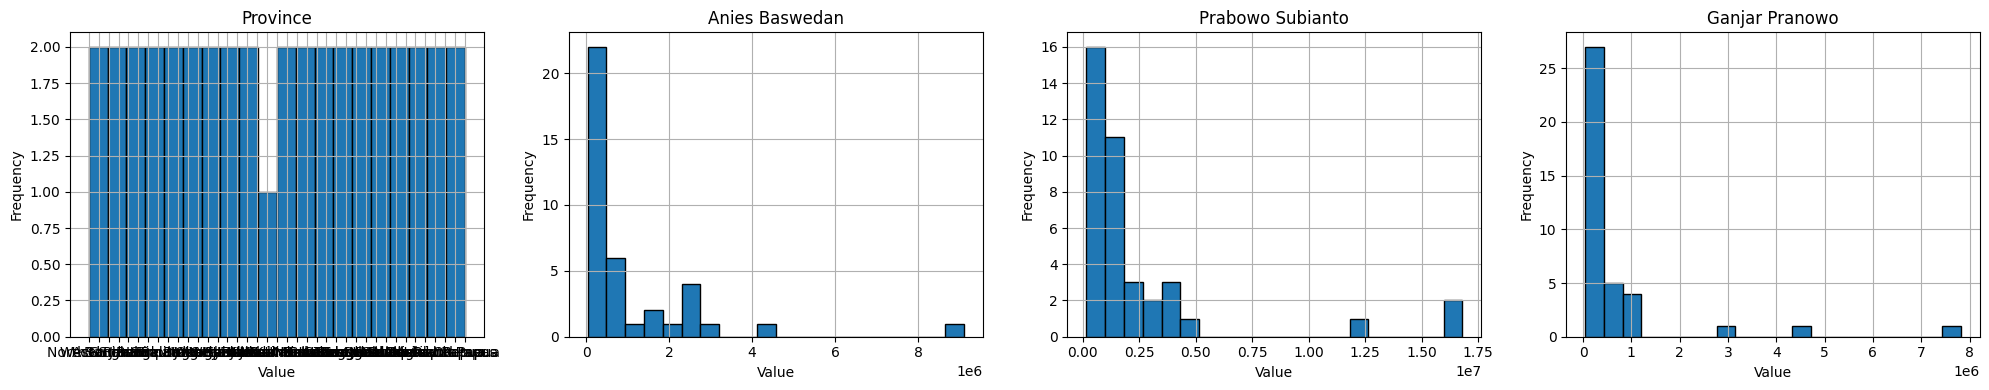

In [15]:
# Menghitung jumlah variabel
num_vars = pemilihan_df.shape[1]
 
# Menentukan jumlah baris dan kolom untuk grid subplot
n_cols = 4  # Jumlah kolom yang diinginkan
n_rows = -(-num_vars // n_cols)  # Ceiling division untuk menentukan jumlah baris
 
# Membuat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
 
# Flatten axes array untuk memudahkan iterasi jika diperlukan
axes = axes.flatten()
 
# Plot setiap variabel
for i, column in enumerate(pemilihan_df.columns):
    pemilihan_df[column].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
 
# Menghapus subplot yang tidak terpakai (jika ada)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
 
# Menyesuaikan layout agar lebih rapi
plt.tight_layout()
plt.show()

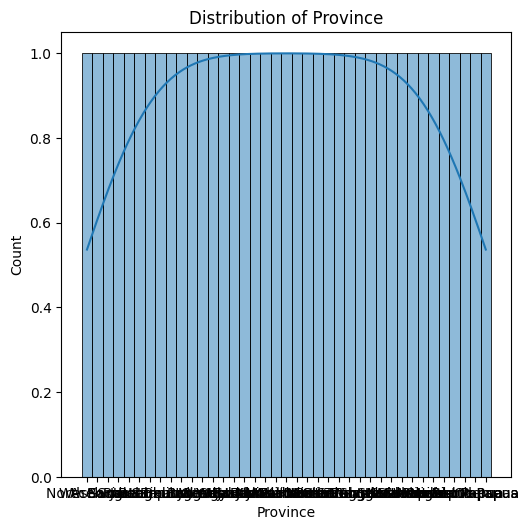

In [16]:
# Visualisasi distribusi data untuk beberapa kolom
columns_to_plot = ['Province']
 
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(pemilihan_df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
 
plt.tight_layout()
plt.show()

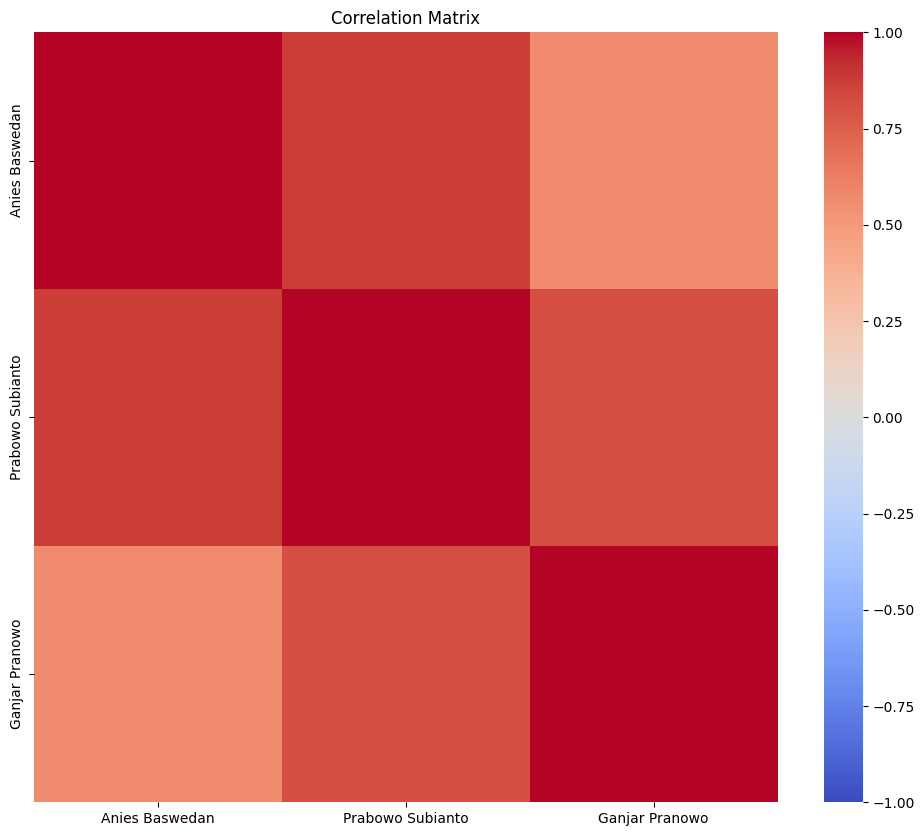

In [18]:
# Visualisasi korelasi antar variabel numerik
plt.figure(figsize=(12, 10))
correlation_matrix = pemilihan_df.drop(columns=['Province']).corr()
 
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

/tmp/ipykernel_19168/1383180011.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Prabowo Subianto', data=pemilihan_df, palette='viridis')


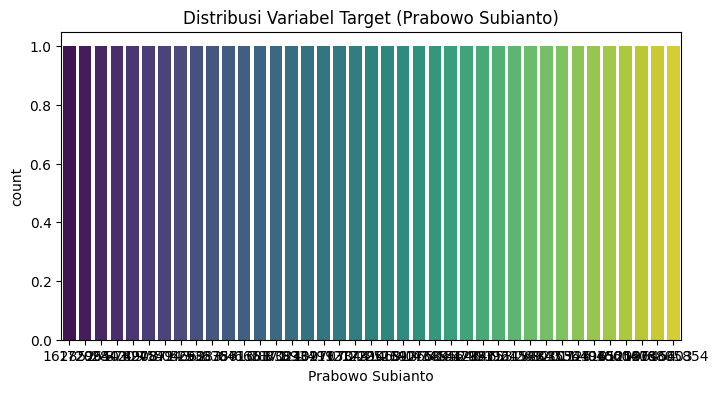

In [28]:
# Visualisasi distribusi variabel target
plt.figure(figsize=(8, 4))
sns.countplot(x='Prabowo Subianto', data=pemilihan_df, palette='viridis')
plt.title('Distribusi Variabel Target (Prabowo Subianto)')
plt.show()

In [29]:
# Menganalisis hubungan antara fitur dan variabel target
plt.figure(figsize=(16, 12))

<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

In [23]:
pemilihan_df.head()

,Province,Anies Baswedan,Prabowo Subianto,Ganjar Pranowo
0,Aceh,2369534,787024,64677
1,North Sumatra,2339620,4660408,999528
2,West Sumatra,1744042,1217314,124044
3,Riau,1400093,1931113,357298
4,Jambi,532605,1438952,234251


/tmp/ipykernel_19168/136147664.py:11: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


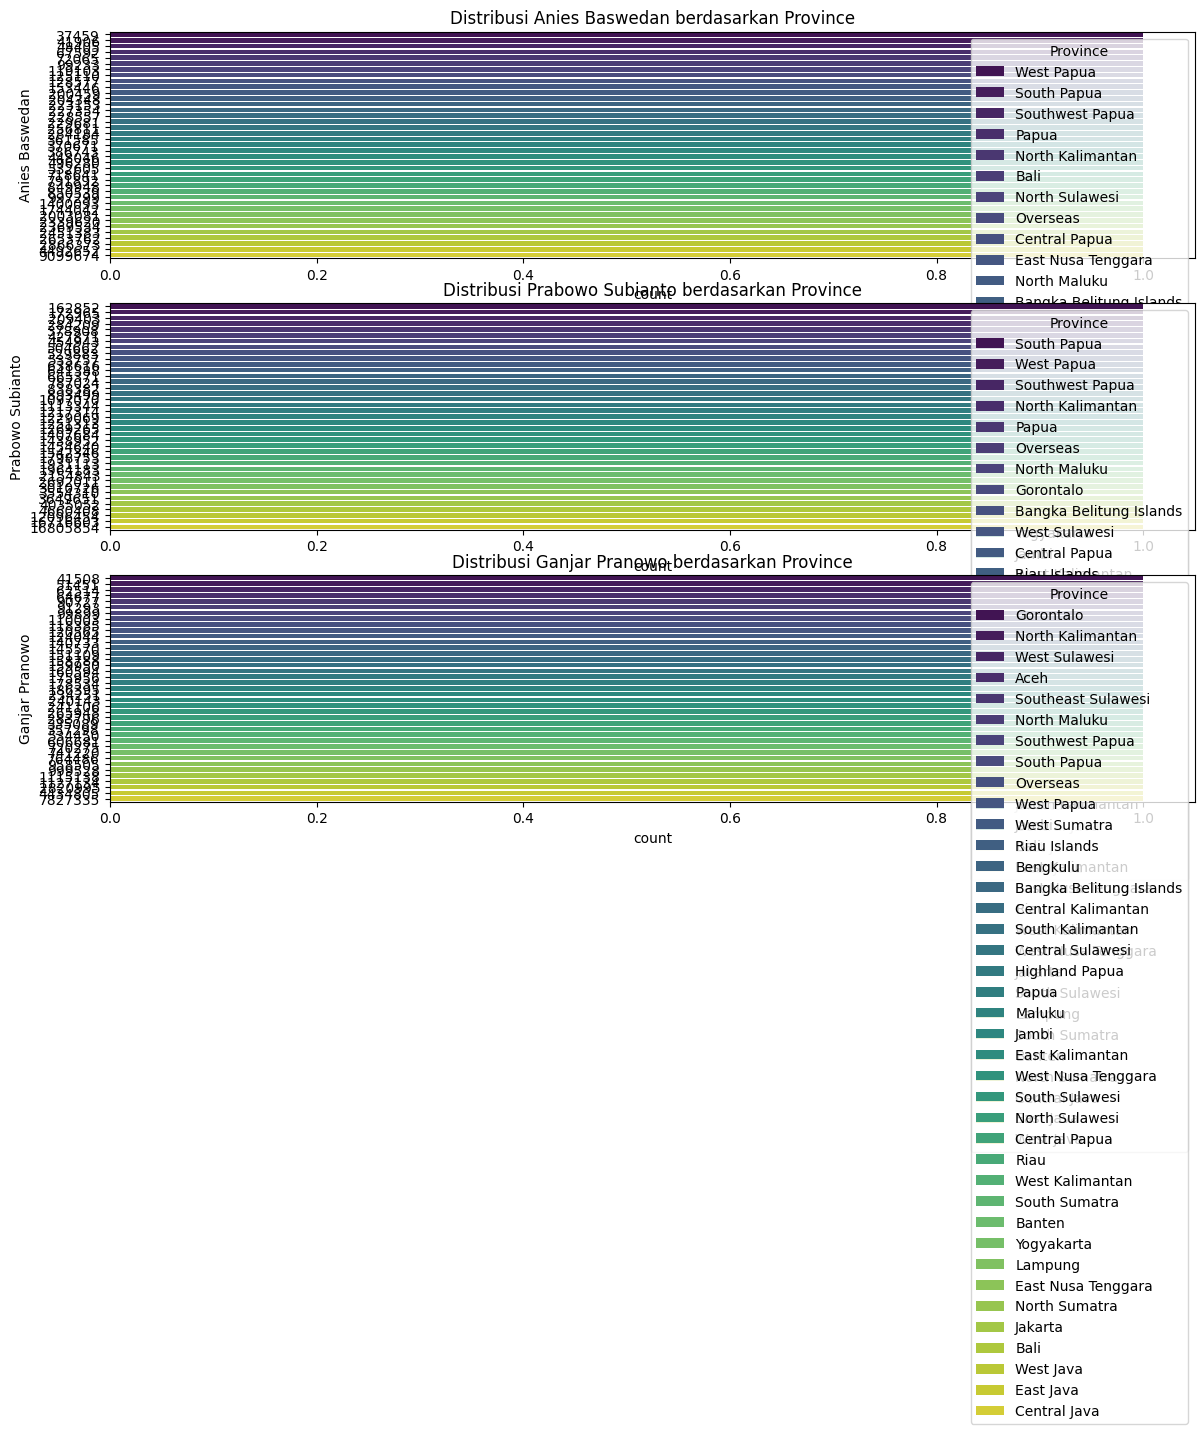

In [36]:
# Fitur kategorikal vs Target
plt.figure(figsize=(14, 10))
num_columns = len(pemilihan_df.columns) - 1  # Exclude 'Province'
plot_index = 1
for column in pemilihan_df.columns:
    if column != 'Province':
        plt.subplot(num_columns, 1, plot_index)
        sns.countplot(y=column, hue='Province', data=pemilihan_df, palette='viridis')
        plt.title(f'Distribusi {column} berdasarkan Province')
        plot_index += 1
plt.tight_layout()
plt.show()

In [43]:
from sklearn.preprocessing import LabelEncoder

# Buat instance LabelEncoder
label_encoder = LabelEncoder()

# List kolom kategorikal yang perlu di-encode
categorical_columns = ['Province']

# Encode kolom kategorikal
pemilihan_df[categorical_columns] = pemilihan_df[categorical_columns].apply(label_encoder.fit_transform)

# Tampilkan DataFrame untuk memastikan encoding telah diterapkan
pemilihan_df.head()


,Province,Anies Baswedan,Prabowo Subianto,Ganjar Pranowo
0,0,2369534,787024,64677
1,21,2339620,4660408,999528
2,37,1744042,1217314,124044
3,24,1400093,1931113,357298
4,15,532605,1438952,234251


In [ ]:
# Buat instance MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi semua kolom numerik
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Pisahkan fitur (X) dan target (y)
X = data.drop(columns=['Exited'])
y = data['Exited']

# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")